# 决策树

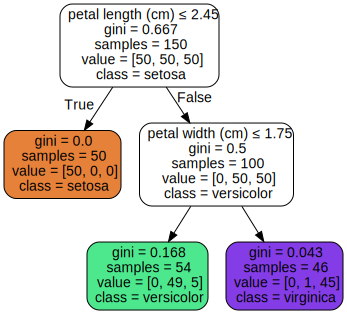

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import graphviz

iris = load_iris()
X_demo = iris['data'][:,2:]
y_demo = iris['target']
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_demo, y_demo)

dot_data = export_graphviz(tree_clf,
                out_file=None,
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True,
                special_characters=True)

graphviz.Source(dot_data)

In [9]:
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


## CART算法 
Classification and Regression Tree<br>
1. 决策树几乎不对训练数据做任何假设
2. 因此决策树的分类边界往往是平行与坐标轴的直线的组合
3. 这一模型通常被称为非参数模型，模型结构可以根据数据的特性自由生长

### 决策树参数
1. min_samples_split 节点分裂前最小样本数量
2. min_samples_leaf 叶节点最小样本数量
3. min_weight_fraction_leaf 
4. max_leaf_nodes 叶节点最大数量
5. max_features 节点分裂前最大样本数量

### CART分类

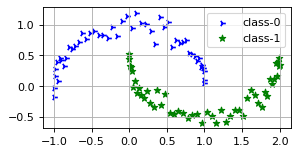

In [6]:
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt

data, label = make_moons()
label = label.astype(np.int32)
data[:,1] = data[:,1] + 0.1 * np.random.normal(0,1,data[:,1].shape)
data_class_0 = []
data_class_1 = []
for index in range(len(label)):
    if label[index] == 0:
        data_class_0.append(data[index,:].tolist())
    else:
        data_class_1.append(data[index,:].tolist())

data_class_0 = np.array(data_class_0)
data_class_1 = np.array(data_class_1)
plt.figure(figsize=(4,2),dpi=80)
plt.scatter(data_class_0[:,0], data_class_0[:,1] ,marker='4', color='b',label="class-0")
plt.scatter(data_class_1[:,0], data_class_1[:,1] ,marker='*', color='g',label="class-1")
plt.grid()
plt.legend()

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

rftree_clf = DecisionTreeClassifier(min_samples_leaf=6, min_samples_split=2)
rftree_clf.fit(data,label)
y_pred = rftree_clf.predict(data)

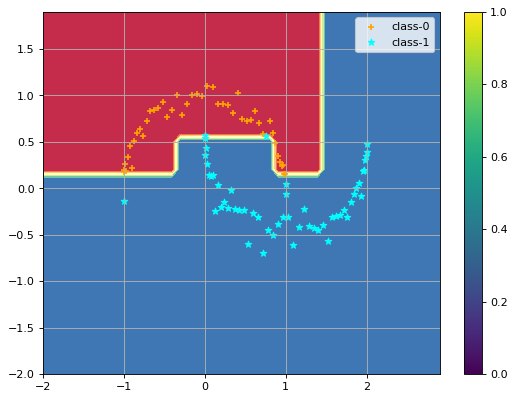

In [51]:
data_pred_class_0 = []
data_pred_class_1 = []
for index in range(len(y_pred)):
    if y_pred[index] == 0:
        data_pred_class_0.append(data[index,:].tolist())
    else:
        data_pred_class_1.append(data[index,:].tolist())
        
data_pred_class_0 = np.array(data_pred_class_0)
data_pred_class_1 = np.array(data_pred_class_1)

x_axis = np.arange(-2,3,0.1)
y_axis = np.arange(-2,2,0.1)
xx,yy = np.meshgrid(x_axis,y_axis)
zz = np.zeros_like(xx)
for ly in range(len(x_axis)):
    for lx in range(len(y_axis)):
        zz[lx, ly] = rftree_clf.predict([[x_axis[ly],y_axis[lx]]])

plt.figure(figsize=(8,6),dpi=80)
plt.contourf(xx,yy,zz,cmap=plt.cm.Spectral)
plt.scatter(data_pred_class_0[:,0],data_pred_class_0[:,1],color='orange',marker='+',label="class-0")
plt.scatter(data_pred_class_1[:,0],data_pred_class_1[:,1],color='cyan',marker='*',label="class-1")
plt.legend()
plt.grid()
plt.colorbar()

### CART回归

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(data, label)

# 随机森林

## Bagging
1. BaggingClassifier - base_estimator 选取参数
2. VotingClassifier - estimators $list[(tuple)]$选取参数

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons

X_vot, y_vot = make_moons(n_samples=10000, noise=0.4)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=
                              [('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                              voting='hard')
voting_clf.fit(X_vot, y_vot)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [2]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_vot, y_vot)
    y_vot_pred = clf.predict(X_vot)
    print(clf.__class__.__name__, accuracy_score(y_vot, y_vot_pred))

LogisticRegression 0.8332
RandomForestClassifier 0.9997
SVC 0.8612
VotingClassifier 0.8871


使用相同的分类器，但是每次都从总数据集中去除不同的数据进行训练
1. Bagging是放回抽样
2. Pasting是无放回抽样
BaggingClassifier中的bootstrap参数将会决定采用Bagging还是Pasting<br>
设置为True = Bagging 设置为False = Pasting

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1)
bag_clf.fit(X_vot,y_vot)
y_pred = bag_clf.predict(X_vot)

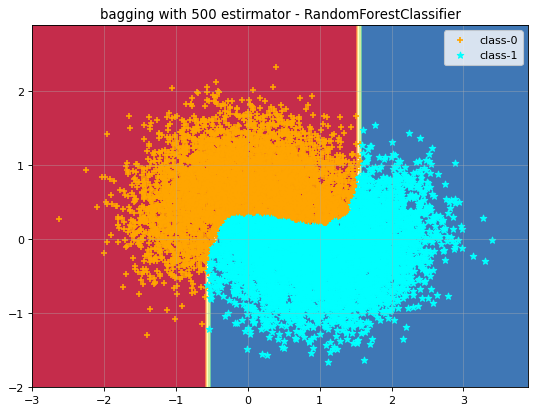

In [10]:
X_class_vot_0 = []
X_class_vot_1 = []
for index in range(len(X_vot)):
    if y_pred[index] == 0:
        X_class_vot_0.append(X_vot[index,:].tolist())
    else:
        X_class_vot_1.append(X_vot[index,:].tolist())
X_class_vot_0 = np.array(X_class_vot_0)
X_class_vot_1 = np.array(X_class_vot_1)

x_vot_axis = np.arange(-3,4,0.1)
y_vot_axis = np.arange(-2,3,0.1)
xx,yy = np.meshgrid(x_vot_axis,y_vot_axis)
zz = np.zeros_like(xx)
for ly in range(len(x_vot_axis)):
    for lx in range(len(y_vot_axis)):
        zz[lx,ly] = bag_clf.predict([[x_vot_axis[ly],y_vot_axis[lx]]])

plt.figure(figsize=(8,6),dpi=80)
plt.title("bagging with 500 estirmator - RandomForestClassifier")
plt.contourf(xx,yy,zz,cmap=plt.cm.Spectral)
plt.scatter(X_class_vot_0[:,0],X_class_vot_0[:,1],color='orange',marker="+",label="class-0")
plt.scatter(X_class_vot_1[:,0],X_class_vot_1[:,1],color='cyan',marker="*",label="class-1")
plt.legend()
plt.colorbar()
plt.grid(alpha=0.4)

### 使用oob对模型进行修正
oob - 没有被所有训练模型采样的数据点
1. 参数为 oob_score = True
2. 预测值为 oob_score_ 用于评价在OOB集上的准确率
2. 输出值为 oob_decision_function_ 用于输出每个数据点的分类预测结果

### 随机贴片与随机子空间
随机贴片即在某一个数据特征上进行采样，而不是对于数据集整体进行采样
1. max_features -> 每个特征采样的数量
2. bootstrap_features -> True表示开启随机贴片

## 随机森林

### RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_vot, y_vot)
y_rnd_pred = rnd_clf.predict(X_vot)
accuracy_score(y_vot, y_rnd_pred)

0.8621

### ExtraTreesClassifier

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
ext_clf.fit(X_vot, y_vot)
y_ext_pred = ext_clf.predict(X_vot)
accuracy_score(y_vot, y_ext_pred)

0.8572

### 查看特征重要度
feature_importances_<br>

#### 鸢尾花数据集

In [12]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf.fit(iris['data'],iris['target'])
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.08832281622572476
sepal width (cm) 0.026218296101303048
petal length (cm) 0.3867637813105955
petal width (cm) 0.4986951063623767


#### MNIST数据集

In [14]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

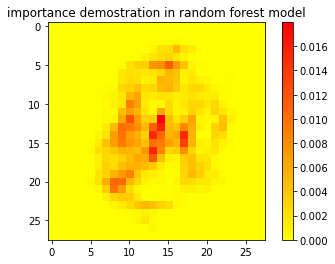

In [15]:
mnist_data = mnist['data']
mnist_target = mnist['target']
rnd_mnist_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes= 16, n_jobs=-1)
rnd_mnist_clf.fit(mnist_data, mnist_target)
mnist_importance = rnd_mnist_clf.feature_importances_
mnist_importance_image = mnist_importance.reshape(28,28)

plt.title('importance demostration in random forest model')
plt.imshow(mnist_importance_image, cmap=plt.cm.autumn_r)
plt.colorbar()

## Boosting

### Adaboost
1. 序列化训练基础模型
2. 为每一个数据点分配一个权值，初始值为$w = \frac{1}{N}$
3. 模型总权值<br>
\* j表示第j个模型<br>
\* i表示第i个数据点<br>
$$
    r_{j} = \frac{\sum_{i=1 \\ \hat y_{j}^{(i)}\ne y^{(i)}}^{N}w^{(i)}}{\sum_{i=1}^{N}w^{(i)}}
$$
4. 权值变化因子
$$
    \alpha_{j} = \eta \cdot \frac{1-r_{j}}{r_{j}}
$$
\* 该公式说明模型预测越准确$\alpha_{j}$值越大
5. 权值更新公式
$$
    w_{(i)} = 
    \left\{
    \begin{array}{ll}
    w^{(i)} & , \hat y_{j}^{(i)}= y^{(i)} \\
    w^{(i)}\cdot exp(\alpha_{j}) & , \hat y_{j}^{(i)}\ne y^{(i)} \\
    \end{array}
    \right.
$$

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200, 
                             algorithm="SAMME.R",
                             learning_rate=0.5)
ada_clf.fit(X_vot,y_vot)
y_ada_pred = ada_clf.predict(X_vot)
accuracy_score(y_vot, y_ada_pred)

0.8607

### 梯度提升BRT
1. Regressor GBRT
2. Classifier GBDT

#### GBDT
1. GBDT 作为boosting模型，具有以下5个共性超参数
    1. n_estimators - 弱分类器数量
    2. learning_rate - 模型残差叠加参数
    3. subsample - 有放回抽样抽样数据占数据集比例[0.5,0.8]
    4. loss - 损失函数
    5. init - 初始模型
2. 弱分类器采用的是DecisionTreeClassifier
    1. max_features
    2. min_examples_leaf
    3. random_state

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# first, define one gbdt
gbdt = GradientBoostingClassifier(learning_rate=0.1,
                                  subsample=0.5,
                                  init=None,
                                  loss='deviance',
                                  random_state=10,
                                  max_features='sqrt',
                                  min_samples_split=300,
                                  min_samples_leaf=20,
                                  max_depth=8)
# then, choose certain superparameters grid searching
param_grid_search_1 = {'n_estimators': range(20,81,10)}
grid_search_1 = GridSearchCV(estimator=gbdt,
                             param_grid=param_grid_search_1,
                             scoring="roc_auc",
                             n_jobs=-1,
                             cv=5)
grid_search_1.fit(X_vot,y_vot)
grid_search_1.best_params_,grid_search_1.best_score_

({'n_estimators': 30}, 0.9363693000000002)

In [46]:
grid_search_1_res = grid_search_1.cv_results_
for score,params in zip(grid_search_1_res['mean_test_score'],grid_search_1_res['params']):
    print('%.8f'%score,'\t',params)

0.93600790 	 {'n_estimators': 20}
0.93636930 	 {'n_estimators': 30}
0.93626440 	 {'n_estimators': 40}
0.93603930 	 {'n_estimators': 50}
0.93570100 	 {'n_estimators': 60}
0.93483990 	 {'n_estimators': 70}
0.93462660 	 {'n_estimators': 80}


#### GBRT

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'best model')

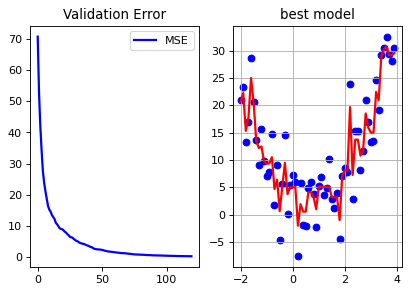

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

x_gbrt = np.arange(-2,4,0.1)
y_gbrt = 3 * x_gbrt**2 - 4 * x_gbrt + 0.5 * np.random.normal(5,10,x_gbrt.shape)

gbrt = GradientBoostingRegressor(n_estimators=120,
                                 learning_rate=0.2,
                                 subsample=0.8)
gbrt.fit(x_gbrt.reshape(-1,1), y_gbrt.reshape(-1,1))
errors = [mean_squared_error(y_gbrt.reshape(-1,1), y_gbrt_pred) 
          for y_gbrt_pred in gbrt.staged_predict(x_gbrt.reshape(-1,1))]
best_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(x_gbrt.reshape(-1,1), y_gbrt.reshape(-1,1))
y_gbrt_best_pred = gbrt_best.predict(x_gbrt.reshape(-1,1))

n_estimators_x = np.arange(len(errors))
plt.figure(figsize=(6,4),dpi=80)
plt.subplots_adjust(wspace=0.2,hspace=0.6)
ax1 = plt.subplot(1,2,1)
ax1.plot(n_estimators_x, errors, lw=2, ls='-', color='b',label='MSE')
ax1.set_title('Validation Error')
ax1.legend()

ax2 = plt.subplot(1,2,2)
ax2.scatter(x_gbrt,y_gbrt,marker='o',color='b')
ax2.plot(x_gbrt,y_gbrt_best_pred,lw=2,ls='-',color='r')
ax2.grid()
ax2.set_title("best model")

#### Early Stopping

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbrt_early_stop = GradientBoostingRegressor(learning_rate=0.1,
                                            subsample=0.8,
                                            warm_start=True)
min_val_error = float('inf')
error_times = 0
for n_estimators in range(1,120):
    gbrt_early_stop.n_estimators = n_estimators
    gbrt_early_stop.fit(x_gbrt.reshape(-1,1), y_gbrt.reshape(-1,1))
    y_gbrt_pred = gbrt_early_stop.predict(x_gbrt.reshape(-1,1))
    val_error = mean_squared_error(y_gbrt.reshape(-1,1), y_gbrt_pred)
    print(n_estimators,val_error)
    if val_error < min_val_error:
        min_val_error = val_error
        error_times = 0
    else:
        error_times +=1
        if error_times > 5:
            break


1 66.78681034250823
2 58.81772629408959
3 49.7792624709272
4 42.75090164027634
5 36.777909885657564
6 31.735653087719264
7 27.838412258458614
8 24.635390425823264
9 22.02422383775163
10 19.756043888685042
11 17.371097729955082
12 15.663236144151618
13 14.558440628223396
14 13.331993227903585
15 12.346284840657631
16 11.628108964296738
17 11.103254507954173
18 10.509108716723993
19 9.884013769002372
20 9.442402489305115
21 9.026918448695648
22 8.69622027430164
23 8.469740557813134
24 8.337705416747282
25 8.077241345678367
26 7.884003259438448
27 7.471571386489696
28 7.31212227234825
29 7.141866083517319
30 6.974148937478221
31 6.660879396210026
32 6.610823178193559
33 6.371690357126795
34 6.11637039487447
35 5.896402935090803
36 5.707967259251074
37 5.600333213728854
38 5.415167927523422
39 5.338871016114848
40 5.266104223953221
41 5.243046753271822
42 5.1324166380924
43 4.967879094120194
44 4.826071933183596
45 4.700558996749131
46 4.638682871875745
47 4.523572337539998
48 4.4207309555

/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/collinsliu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected

## Stacking
1. 使用第一层模型的组合输出作为blending层的输入进行预测